In [2]:
import pandas as pd
from textblob import TextBlob
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
folder_path= 'E:\\Case Comp\\NEST\\Training\\'
# usecase_3.to_parquet(parquet_file_path, index=False)

# Load the Parquet file back into a DataFrame
usecase_3 = pd.read_csv(folder_path + 'category_updated_train.csv', index_col=False)

In [4]:
usecase_3

,Unnamed: 0.1,Unnamed: 0,NCT Number,Study Title,Study Status,Brief Summary,Conditions,Primary Outcome Measures,Secondary Outcome Measures,Other Outcome Measures,...,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Month,Start Quarter,Condition Category,Conditions_Category,Locations
0,0,0,NCT00559130,Efficacy Study of CytoSorb Hemoperfusion Devic...,Completed,The hypothesis of this study is use of CytoSor...,Acute Respiratory Distress Syndrome|Acute Lung...,Relative IL-6 levels as a percent (%) of basel...,"Ventilator Free Days, Reduction cytokines TNF-...",NaN,...,NaN,100.0,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,11,4,Other Rare or Unclassified,Other Rare or Unclassified,"Aachen, Germany|Berlin, Germany|Bonn, Germany|..."
1,1,1,NCT00937664,Safety and Tolerability Study of AZD7762 in Co...,Not_Completed,The primary purpose of this study is to find o...,Cancer|Solid Tumors|Advanced Solid Malignancies,Assessment of adverse events (based on CTCAE v...,Pharmacokinetic effect of AZD7762 when adminis...,NaN,...,PHASE1,24.0,INDUSTRY,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,7,3,Oncology,Oncology,"Research Site, Minami-ku, Fukuoka, Japan"
2,2,2,NCT00441597,Does Atorvastatin Reduce Ischemia-Reperfusion ...,Completed,To study the impact of 3 day exposure to atorv...,Ischemia Reperfusion Injury|Cardiovascular Dis...,Annexin A 5 targeting in the non dominant then...,"workload during ischemic exercise, workload du...",NaN,...,PHASE4,30.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2,1,Other Rare or Unclassified,Other Rare or Unclassified,"Radboud University Nijmegen Medical Centre, Ni..."
3,3,3,NCT03296228,Comparison of Dynamic Radiographs in Determini...,Completed,The purpose of this study is to identify the f...,Adolescent Idiopathic Scoliosis,Investigate the flexibility equivalence of dif...,Incorporate these findings into the Lenke Clas...,NaN,...,NaN,134.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,-1,-1,Other Rare or Unclassified,Non-Oncology,"Duchess of Kent Children's Hospital, Hong Kong..."
4,4,4,NCT00421603,A Placebo-Controlled Study of Mixed Amphetamin...,Completed,"The proposed protocol is a double-blind, place...",Cocaine Dependence,Three Weeks of Continuous Cocaine Abstinence a...,NaN,NaN,...,PHASE2,81.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2,1,Other Rare or Unclassified,Non-Oncology,"STARS, New York, New York, 10032, United States"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257572,257572,257572,NCT02360800,Trial Comparing Tisseel as an Adjunct to Tradi...,Completed,Bleeding after redo cardiac surgery is a commo...,Hemorrhage,Bleeding (Amount of blood (ml) collected in ch...,Allogeneic blood Sparing (Amount of Allogeneic...,NaN,...,NaN,120.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,-1,-1,Other Rare or Unclassified,Non-Oncology,"European Hospital, Rome, Lazio, 00149, Italy"
257573,257573,257573,NCT02352506,Serum MIF in Acute Kidney Injury,Completed,Acute kidney injury (AKI) is a common complica...,Acute Kidney Injury,"Macrophage migration inhibitory factor, Up to ...","Serum creatinine, Up to 14 days",NaN,...,NaN,500.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,1,1,Other Rare or Unclassified,Non-Oncology,"Medical University of Vienna, Vienna, 1090, Au..."
257574,257574,257574,NCT04996381,Feasibility of AI-based Heart Function Predict...,Completed,The investigators will develop an artificial i...,Chest X-ray for Clinical Evaluation,"Left Ventricular Ejection Fraction < 40%, Eval...",NaN,NaN,...,NaN,505.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,-1,-1,Other Rare or Unclassified,Other Rare or Unclassified,"Yongin Severance Hospital, Yongin, Giheung-gu,..."
257575,257575,257575,NCT00380640,The Efficacy of Trimethoprim in Wound Healing ...,Completed,The purpose of this study

In [5]:
# Ensure Start Date is in datetime format
usecase_3['Start Date'] = pd.to_datetime(usecase_3['Start Date'], errors='coerce')

# Extract month and quarter, handling missing values
usecase_3['Start Month'] = usecase_3['Start Date'].dt.month.fillna(-1).astype(int).astype('category')
usecase_3['Start Quarter'] = usecase_3['Start Date'].dt.quarter.fillna(-1).astype(int).astype('category')

# Verify the changes
usecase_3[['Start Date', 'Start Month', 'Start Quarter']].head()

KeyError: 'Start Date'

In [6]:
usecase_3 = usecase_3[['NCT Number', 'Study Title', 'Study Status',
       'Brief Summary', 'Conditions', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'Other Outcome Measures', 'Sponsor',
       'Collaborators', 'Sex', 'Age', 'Phases', 'Enrollment', 'Funder Type',
       'Study Type', 'Study Design', 'Start Month', 'Start Quarter', 'Conditions_Category', 'Locations']]
usecase_3.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Conditions', 'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Start Month', 'Start Quarter', 'Conditions_Category', 'Locations'],
      dtype='object')

In [7]:
usecase_3.Conditions_Category.value_counts()

Conditions_Category
Non-Oncology                  151880
Other Rare or Unclassified     69621
Oncology                       36076
Name: count, dtype: int64

In [79]:
conditions_category_distribution = (
    usecase_3.groupby(['Conditions_Category', 'Study Status']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)
)
conditions_category_distribution

,Study Status,COMPLETED,SUSPENDED,TERMINATED,WITHDRAWN
Conditions_Category,Conditions_Category,,,,
Non-Oncology,Non-Oncology,86.896552,1.034483,7.586207,4.482759
Oncology,Oncology,79.661017,0.000000,15.254237,5.084746
Other Rare or Unclassified,Other Rare or Unclassified,87.417219,0.000000,7.284768,5.298013


In [80]:
usecase_3['Collaborators'].value_counts()

Collaborators
National Cancer Institute (NCI)                                                                                                                                                                                                                         9
Pfizer                                                                                                                                                                                                                                                  4
National Institute of Mental Health (NIMH)                                                                                                                                                                                                              3
National Institute on Alcohol Abuse and Alcoholism (NIAAA)                                                                                                                                                                                  

In [81]:
# Count number of collaborators per trial
usecase_3['Num_Collaborators'] = usecase_3['Collaborators'].apply(lambda x: len(str(x).split('|')) if pd.notna(x) else 0)
# Count number of collaborators per trial
usecase_3['Num_Collaborators'] = usecase_3['Collaborators'].apply(lambda x: len(str(x).split('|')) if pd.notna(x) else 0)
# Expanded keyword-based classification
def refine_collaborator_type(collaborator):
    if pd.isna(collaborator) or collaborator.strip() == "":
        return "Unknown"

    collaborator = collaborator.lower()

    # Pharmaceutical/Biotech Companies
    if any(x in collaborator for x in ["pharma", "biotech", "therapeutics", "biosciences", "genomics", "biopharma", "life sciences", "vaccines", "therapeutics"]):
        return "Pharmaceutical/Biotech"

    # Medical Device Companies
    elif any(x in collaborator for x in ["medtech", "medical devices", "diagnostics", "boston scientific", "medtronic", "abbott", "siemens healthineers", "imaging", "st. jude medical", "stryker"]):
        return "Medical Device Company"

    # Universities & Academic Institutions
    elif any(x in collaborator for x in ["university", "college", "academy", "school of medicine", "medical school"]):
        return "University"

    # Hospitals & Medical Centers
    elif any(x in collaborator for x in ["hospital", "medical center", "health system", "clinic", "health network", "cancer center", "teaching hospital"]):
        return "Hospital/Medical Center"

    # Academic Research Centers
    elif any(x in collaborator for x in ["institute of technology", "research institute", "academic research", "broad institute", "howard hughes", "karolinska institute"]):
        return "Academic Research Institute"

    # Non-Academic Research Centers
    elif any(x in collaborator for x in ["national laboratory", "max planck", "clinical research", "research foundation"]):
        return "Non-Academic Research Institute"

    # Government & Public Health Agencies
    elif any(x in collaborator for x in ["national", "federal", "ministry of health", "nih", "fda", "cdc", "who", "government", "department of health", "european medicines agency", "health canada"]):
        return "Government"

    # Military & Defense Medical Research
    elif any(x in collaborator for x in ["military", "army", "navy", "air force", "veterans affairs", "dod", "defense", "va medical", "darpa", "us army medical research"]):
        return "Military/Defense Medical Research"

    # Non-Profit Organizations & NGOs
    elif any(x in collaborator for x in ["non-profit", "ngo", "humanitarian", "relief fund", "patient advocacy", "community group", "alzheimer's association", "parkinson's foundation"]):
        return "Non-Profit / Patient Advocacy"

    # Foundations (Funding Agencies)
    elif any(x in collaborator for x in ["foundation", "charitable trust", "funding agency", "gates foundation", "michael j. fox foundation"]):
        return "Foundation (Funding Organization)"

    # Contract Research Organizations (CROs)
    elif any(x in collaborator for x in ["quintiles", "iqvia", "parexel", "covance", "medpace", "ppd", "icon", "charles river", "syneos", "contract research"]):
        return "Contract Research Organization (CRO)"

    # Healthcare Consortia & Alliances
    elif any(x in collaborator for x in ["consortium", "partnership", "collaborative", "alliance", "global initiative"]):
        return "Healthcare Consortium/Alliance"

    # If no match, return Other
    else:
        return "Other"

# Apply classification
usecase_3['Collaborator_Type'] = usecase_3['Collaborators'].apply(refine_collaborator_type)
usecase_3.head()

C:\Users\mogal\AppData\Local\Temp\ipykernel_16756\1933943471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usecase_3['Num_Collaborators'] = usecase_3['Collaborators'].apply(lambda x: len(str(x).split('|')) if pd.notna(x) else 0)
C:\Users\mogal\AppData\Local\Temp\ipykernel_16756\1933943471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usecase_3['Num_Collaborators'] = usecase_3['Collaborators'].apply(lambda x: len(str(x).split('|')) if pd.notna(x) else 0)
C:\Users\mogal\AppData\Local\Temp\ipykerne

,NCT Number,Study Title,Study Status,Brief Summary,Conditions,Primary Outcome Measures,Secondary Outcome Measures,Other Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Month,Start Quarter,Conditions_Category,Locations,Num_Collaborators,Collaborator_Type
0,NCT00559130,Efficacy Study of CytoSorb Hemoperfusion Devic...,COMPLETED,The hypothesis of this study is use of CytoSor...,Acute Respiratory Distress Syndrome|Acute Lung...,Relative IL-6 levels as a percent (%) of basel...,"Ventilator Free Days, Reduction cytokines TNF-...",NaN,"MedaSorb Technologies, Inc",NaN,...,100.0,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,11,4,Other Rare or Unclassified,"Aachen, Germany|Berlin, Germany|Bonn, Germany|...",0,Unknown
1,NCT00937664,Safety and Tolerability Study of AZD7762 in Co...,TERMINATED,The primary purpose of this study is to find o...,Cancer|Solid Tumors|Advanced Solid Malignancies,Assessment of adverse events (based on CTCAE v...,Pharmacokinetic effect of AZD7762 when adminis...,NaN,AstraZeneca,NaN,...,24.0,INDUSTRY,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,7,3,Oncology,"Research Site, Minami-ku, Fukuoka, Japan",0,Unknown
2,NCT00441597,Does Atorvastatin Reduce Ischemia-Reperfusion ...,COMPLETED,To study the impact of 3 day exposure to atorv...,Ischemia Reperfusion Injury|Cardiovascular Dis...,Annexin A 5 targeting in the non dominant then...,"workload during ischemic exercise, workload du...",NaN,Radboud University Medical Center,Pfizer,...,30.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2,1,Other Rare or Unclassified,"Radboud University Nijmegen Medical Centre, Ni...",1,Other
3,NCT03296228,Comparison of Dynamic Radiographs in Determini...,COMPLETED,The purpose of this study is to identify the f...,Adolescent Idiopathic Scoliosis,Investigate the flexibility equivalence of dif...,Incorporate these findings into the Lenke Clas...,NaN,The University of Hong Kong,"AO Foundation, AO Spine",...,134.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,-1,-1,Non-Oncology,"Duchess of Kent Children's Hospital, Hong Kong...",1,Foundation (Funding Organization)
4,NCT00421603,A Placebo-Controlled Study of Mixed Amphetamin...,COMPLETED,"The proposed protocol is a double-blind, place...",Cocaine Dependence,Three Weeks of Continuous Cocaine Abstinence a...,NaN,NaN,New York State Psychiatric Institute,National Institute on Drug Abuse (NIDA),...,81.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2,1,Non-Oncology,"STARS, New York, New York, 10032, United States",1,Government


In [82]:
usecase_3.Collaborator_Type.value_counts()

Collaborator_Type
Unknown                                 344
Other                                    55
University                               36
Government                               32
Hospital/Medical Center                  10
Pharmaceutical/Biotech                    7
Contract Research Organization (CRO)      5
Foundation (Funding Organization)         4
Academic Research Institute               3
Medical Device Company                    3
Military/Defense Medical Research         1
Name: count, dtype: int64

In [83]:
usecase_3['Sex'] = usecase_3['Sex'].fillna('ALL')

C:\Users\mogal\AppData\Local\Temp\ipykernel_16756\4271921406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usecase_3['Sex'] = usecase_3['Sex'].fillna('ALL')


In [84]:
usecase_3 = usecase_3.drop(columns=['Collaborators'])
usecase_3.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Conditions', 'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Sex', 'Age', 'Phases',
       'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Start Month', 'Start Quarter', 'Conditions_Category', 'Locations',
       'Num_Collaborators', 'Collaborator_Type'],
      dtype='object')

In [8]:
missing_count = usecase_3.isnull().sum()

# Percentage of missing values in each column
missing_percentage = (missing_count / len(usecase_3)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})
missing_summary

,Missing Count,Missing Percentage (%)
NCT Number,0,0.000000
Study Title,0,0.000000
Study Status,0,0.000000
Brief Summary,0,0.000000
Conditions,0,0.000000
Primary Outcome Measures,10491,4.072957
Secondary Outcome Measures,71798,27.874383
Other Outcome Measures,239305,92.906199
Sponsor,0,0.000000
Collaborators,173898,67.513016


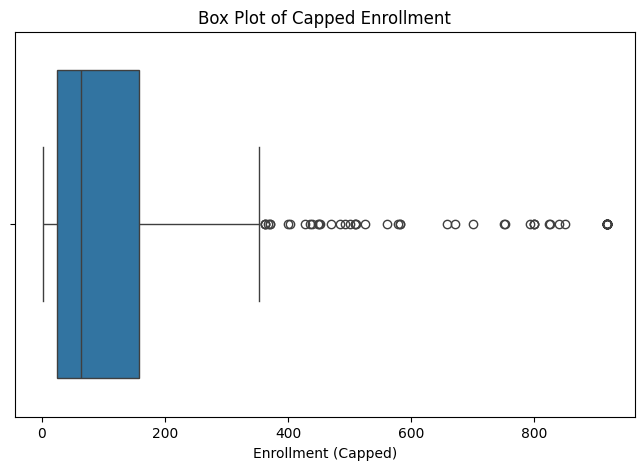

In [86]:
# Define IQR-based outlier capping function
def cap_outliers(series, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = np.percentile(series.dropna(), lower_percentile * 100)
    upper_bound = np.percentile(series.dropna(), upper_percentile * 100)
    return np.clip(series, lower_bound, upper_bound)

# Cap outliers in Enrollment column
usecase_3['Enrollment_Capped'] = cap_outliers(usecase_3['Enrollment'])

# Create a box plot for Enrollment after capping outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=usecase_3['Enrollment_Capped'])

# Set title and labels
plt.title('Box Plot of Capped Enrollment')
plt.xlabel('Enrollment (Capped)')

# Show plot
plt.show()

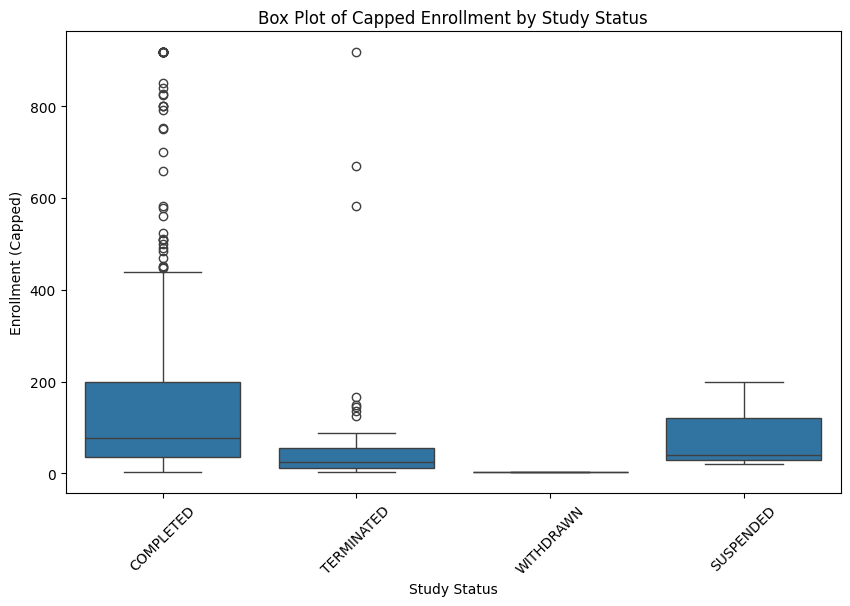

In [87]:
# Check if the dataset is available before proceeding
if 'usecase_3' in locals():
    # Group by Study Status and apply outlier capping on Enrollment
    usecase_3['Enrollment_Capped'] = cap_outliers(usecase_3['Enrollment'])

    # Create a box plot for Enrollment categorized by Study Status
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=usecase_3['Study Status'], y=usecase_3['Enrollment_Capped'])

    # Set title and labels
    plt.title('Box Plot of Capped Enrollment by Study Status')
    plt.xlabel('Study Status')
    plt.ylabel('Enrollment (Capped)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Show plot
    plt.show()
else:
    print("Dataset 'usecase_3' not found. Please upload the dataset.")

In [88]:
# Calculate percentage of missing Enrollment by Study Status
missing_enrollment_pct = usecase_3.groupby('Study Status')['Enrollment'].apply(lambda x: x.isna().mean() * 100)

# Convert to DataFrame for better visualization
missing_enrollment_df = missing_enrollment_pct.reset_index().rename(columns={'Enrollment': 'Missing Enrollment (%)'})

# Display the result
print(missing_enrollment_df)

  Study Status  Missing Enrollment (%)
0    COMPLETED                1.856148
1    SUSPENDED                0.000000
2   TERMINATED                0.000000
3    WITHDRAWN                0.000000


In [89]:
# Calculate median enrollment for each Study Status group
median_enrollment = usecase_3.groupby('Study Status')['Enrollment'].median()

# Fill missing values using the median of the respective Study Status group
usecase_3['Enrollment'] = usecase_3.apply(
    lambda row: median_enrollment[row['Study Status']] if pd.isna(row['Enrollment']) else row['Enrollment'], axis=1
)

In [90]:
# usecase_3 = usecase_3.dropna(subset=['Primary Outcome Measures'])

In [91]:
# Combine the text from the three columns, handling missing values
usecase_3['Total Outcome Measures'] = usecase_3[['Primary Outcome Measures', 'Secondary Outcome Measures', 'Other Outcome Measures']].apply(
    lambda row: ' | '.join(row.dropna().astype(str)), axis=1
)

# Drop the original columns
usecase_3.drop(columns=['Primary Outcome Measures', 'Secondary Outcome Measures', 'Other Outcome Measures'], inplace=True)

# Verify the changes
usecase_3[['Total Outcome Measures']].head()

,Total Outcome Measures
0,Relative IL-6 levels as a percent (%) of basel...
1,Assessment of adverse events (based on CTCAE v...
2,Annexin A 5 targeting in the non dominant then...
3,Investigate the flexibility equivalence of dif...
4,Three Weeks of Continuous Cocaine Abstinence a...


In [92]:
usecase_3.drop(columns=['Enrollment_Capped'], inplace=True)

In [93]:
missing_count = usecase_3.isnull().sum()

# Percentage of missing values in each column
missing_percentage = (missing_count / len(usecase_3)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})
missing_summary

,Missing Count,Missing Percentage (%)
NCT Number,0,0.0
Study Title,0,0.0
Study Status,0,0.0
Brief Summary,0,0.0
Conditions,0,0.0
Sponsor,0,0.0
Sex,0,0.0
Age,0,0.0
Phases,289,57.8
Enrollment,0,0.0


In [94]:
# Lists of columns
columns_mode = ['Age', 'Sex']
columns_unknown = ['Funder Type', 'Study Type', 'Study Design', 'Total Outcome Measures']

# Fill numerical columns with median
for col in columns_mode:
    mode_value = usecase_3[col].mode()
    usecase_3[col].fillna(mode_value, inplace=True)

# Fill categorical columns with 'unknown'
for col in columns_unknown:
    usecase_3[col].fillna('Unknown', inplace=True)

In [95]:
pd.DataFrame(usecase_3.Conditions.value_counts()).head(50)

,count
Conditions,
Healthy,13
Breast Cancer,6
Healthy Volunteers,5
Obesity,4
Heart Failure,4
Alzheimer's Disease,3
Healthy Participants,3
Stroke,3
Pancreatic Cancer,3


In [96]:
# Define a function to classify conditions with detailed categories
def classify_condition(condition):
    if pd.isnull(condition):
        return 'Unknown'

    condition_lower = condition.lower()

    # Cancer-related conditions
    if any(keyword in condition_lower for keyword in ['cancer', 'tumor', 'carcinoma', 'lymphoma', 'leukemia', 'melanoma']):
        return 'Cancer'

    # Cardiovascular diseases
    if any(keyword in condition_lower for keyword in ['heart', 'cardio', 'vascular', 'stroke', 'artery', 'hypertension', 'atrial']):
        return 'Cardiovascular'

    # Neurological disorders
    if any(keyword in condition_lower for keyword in ['brain', 'neuro', 'alzheimer', 'parkinson', 'epilepsy', 'multiple sclerosis']):
        return 'Neurological'

    # Infectious diseases
    if any(keyword in condition_lower for keyword in ['infection', 'virus', 'bacterial', 'hiv', 'malaria', 'covid', 'influenza']):
        return 'Infectious Diseases'

    # Endocrine and metabolic disorders
    if any(keyword in condition_lower for keyword in ['diabetes', 'thyroid', 'obesity', 'metabolic', 'insulin']):
        return 'Endocrine/Metabolic'

    # Respiratory conditions
    if any(keyword in condition_lower for keyword in ['asthma', 'lung', 'copd', 'pulmonary']):
        return 'Respiratory'

    # Gastrointestinal & Hepatic diseases
    if any(keyword in condition_lower for keyword in ['liver', 'hepatic', 'pancreatic', 'colorectal', 'gastro']):
        return 'Gastrointestinal & Hepatic'

    # Autoimmune and inflammatory conditions
    if any(keyword in condition_lower for keyword in ['arthritis', 'rheumatoid', 'psoriasis', 'inflammatory', 'lupus', 'crohn']):
        return 'Autoimmune & Inflammatory'

    # Musculoskeletal disorders
    if any(keyword in condition_lower for keyword in ['osteoporosis', 'osteoarthritis', 'fracture', 'spine', 'back pain', 'knee']):
        return 'Musculoskeletal'

    # Psychiatric & behavioral disorders
    if any(keyword in condition_lower for keyword in ['schizophrenia', 'bipolar', 'depression', 'psychiatric', 'mental health']):
        return 'Psychiatric & Behavioral'

    # Reproductive & urological disorders
    if any(keyword in condition_lower for keyword in ['infertility', 'prostate', 'kidney', 'renal', 'bladder', 'reproductive']):
        return 'Reproductive & Urological'

    # General health & other
    if any(keyword in condition_lower for keyword in ['healthy', 'general health', 'volunteers']):
        return 'General Health & Others'

    # Default to "Other" for unspecified conditions
    return 'Other'

# Apply the improved classification function
usecase_3['Condition_Category_old'] = usecase_3['Conditions'].apply(classify_condition)

# Verify results
usecase_3[['Conditions', 'Condition_Category_old']].head(20)

,Conditions,Condition_Category_old
0,Acute Respiratory Distress Syndrome|Acute Lung...,Respiratory
1,Cancer|Solid Tumors|Advanced Solid Malignancies,Cancer
2,Ischemia Reperfusion Injury|Cardiovascular Dis...,Cardiovascular
3,Adolescent Idiopathic Scoliosis,Other
4,Cocaine Dependence,Other
5,Surgical Wound Infection,Infectious Diseases
6,Sonoelastography|Elastography|Elastograms|Live...,Gastrointestinal & Hepatic
7,Stunting|Undernutrition,Other
8,Pancreatic Cancer,Cancer
9,Cancer,Cancer


In [97]:
usecase_3.Condition_Category_old.value_counts()

Condition_Category_old
Other                         247
Cancer                         56
Cardiovascular                 39
Infectious Diseases            33
General Health & Others        24
Endocrine/Metabolic            24
Neurological                   16
Respiratory                    15
Autoimmune & Inflammatory      13
Musculoskeletal                10
Reproductive & Urological      10
Psychiatric & Behavioral        8
Gastrointestinal & Hepatic      5
Name: count, dtype: int64

In [98]:
usecase_3.drop(columns=['Conditions'], inplace=True)

In [99]:
# Define a function to classify sponsors
def classify_sponsor(sponsor):
    if pd.isnull(sponsor):
        return 'Unknown'
    sponsor_lower = sponsor.lower()

    # University
    if 'university' in sponsor_lower or 'school of medicine' in sponsor_lower:
        return 'University'

    # Hospital or Clinic
    if 'hospital' in sponsor_lower or 'clinic' in sponsor_lower or 'center' in sponsor_lower:
        return 'Hospital/Clinic'

    # Company
    company_keywords = ['pharmaceuticals', 'biopharma', 'biosciences', 'llc', 'inc',
                         'company', 'a/s', 'ltd', 'plc', 'corporation']
    if any(keyword in sponsor_lower for keyword in company_keywords):
        return 'Company'

    # Government Institute
    gov_keywords = ['national', 'institute', 'office of research', 'va', 'nci', 'niaid']
    if any(keyword in sponsor_lower for keyword in gov_keywords):
        return 'Government Institute'

    # Other
    return 'Other'

# Apply the classification function to the Sponsor column
usecase_3['Sponsor Type'] = usecase_3['Sponsor'].apply(classify_sponsor)
usecase_3.drop(columns=['Sponsor'], inplace=True)
# Verify the distribution of Sponsor Type
print(usecase_3['Sponsor Type'].value_counts())

Sponsor Type
University              190
Other                   123
Company                  79
Hospital/Clinic          75
Government Institute     33
Name: count, dtype: int64


In [100]:
usecase_3.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary', 'Sex',
       'Age', 'Phases', 'Enrollment', 'Funder Type', 'Study Type',
       'Study Design', 'Start Month', 'Start Quarter', 'Conditions_Category',
       'Locations', 'Num_Collaborators', 'Collaborator_Type',
       'Total Outcome Measures', 'Condition_Category_old', 'Sponsor Type'],
      dtype='object')

In [101]:
# Define the unique age categories
age_categories = ['CHILD', 'ADULT', 'OLDER_ADULT']

# Create binary columns for each age group
for category in age_categories:
    usecase_3[category] = usecase_3['Age'].apply(lambda x: 1 if isinstance(x, str) and category in x else 0)

# Drop the original 'Age' column
usecase_3.drop(columns=['Age'], inplace=True)

# Display the modified DataFrame
usecase_3.head()

,NCT Number,Study Title,Study Status,Brief Summary,Sex,Phases,Enrollment,Funder Type,Study Type,Study Design,...,Conditions_Category,Locations,Num_Collaborators,Collaborator_Type,Total Outcome Measures,Condition_Category_old,Sponsor Type,CHILD,ADULT,OLDER_ADULT
0,NCT00559130,Efficacy Study of CytoSorb Hemoperfusion Devic...,COMPLETED,The hypothesis of this study is use of CytoSor...,ALL,NaN,100.0,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,...,Other Rare or Unclassified,"Aachen, Germany|Berlin, Germany|Bonn, Germany|...",0,Unknown,Relative IL-6 levels as a percent (%) of basel...,Respiratory,Company,0,1,1
1,NCT00937664,Safety and Tolerability Study of AZD7762 in Co...,TERMINATED,The primary purpose of this study is to find o...,ALL,PHASE1,24.0,INDUSTRY,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,...,Oncology,"Research Site, Minami-ku, Fukuoka, Japan",0,Unknown,Assessment of adverse events (based on CTCAE v...,Cancer,Other,0,1,1
2,NCT00441597,Does Atorvastatin Reduce Ischemia-Reperfusion ...,COMPLETED,To study the impact of 3 day exposure to atorv...,MALE,PHASE4,30.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,...,Other Rare or Unclassified,"Radboud University Nijmegen Medical Centre, Ni...",1,Other,Annexin A 5 targeting in the non dominant then...,Cardiovascular,University,0,1,0
3,NCT03296228,Comparison of Dynamic Radiographs in Determini...,COMPLETED,The purpose of this study is to identify the f...,ALL,NaN,134.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,...,Non-Oncology,"Duchess of Kent Children's Hospital, Hong Kong...",1,Foundation (Funding Organization),Investigate the flexibility equivalence of dif...,Other,University,1,1,0
4,NCT00421603,A Placebo-Controlled Study of Mixed Amphetamin...,COMPLETED,"The proposed protocol is a double-blind, place...",ALL,PHASE2,81.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,...,Non-Oncology,"STARS, New York, New York, 10032, United States",1,Government,Three Weeks of Continuous Cocaine Abstinence a...,Other,Government Institute,0,1,0


In [102]:
usecase_3['Study Design'].value_counts().head(50)

Study Design
Observational Model: |Time Perspective: p                                                                                                                           102
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT                                                                         44
Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT                                                                             43
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT      19
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (PARTICIPANT, INVESTIGATOR)|Primary Purpose: TREATMENT                                           13
Allocation: NON_RANDOMIZED|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT                                               

In [103]:
# Function to extract attribute values
def extract_attribute(study_design, attribute):
    if pd.isnull(study_design):
        return None
    for part in study_design.split('|'):
        if attribute in part:
            return part.split(':')[1].strip() if ':' in part else None
    return None

# Extract key features
usecase_3['Allocation'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Allocation'))
usecase_3['Intervention Model'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Intervention Model'))
usecase_3['Masking'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Masking'))
usecase_3['Primary Purpose'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Primary Purpose'))
usecase_3['Observational Model'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Observational Model'))
usecase_3['Time Perspective'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Time Perspective'))

# Extract Masking Level
def extract_masking_level(masking):
    if pd.isnull(masking):
        return 'NONE'
    if 'QUADRUPLE' in masking:
        return 'QUADRUPLE'
    if 'TRIPLE' in masking:
        return 'TRIPLE'
    if 'DOUBLE' in masking:
        return 'DOUBLE'
    if 'SINGLE' in masking:
        return 'SINGLE'
    return 'NONE'

usecase_3['Masking Level'] = usecase_3['Masking'].apply(extract_masking_level)

# Extract Masking Details
def extract_masking_details(masking):
    if pd.isnull(masking):
        return 'NONE'
    if '(' in masking:
        return masking.split('(')[1].strip(')')
    return 'NONE'

usecase_3['Masking Details'] = usecase_3['Masking'].apply(extract_masking_details)

# Handle missing values by filling with 'Unknown'
usecase_3['Allocation'].fillna('Unknown', inplace=True)
usecase_3['Intervention Model'].fillna('Unknown', inplace=True)
usecase_3['Primary Purpose'].fillna('Unknown', inplace=True)
usecase_3['Observational Model'].fillna('Unknown', inplace=True)
usecase_3['Time Perspective'].fillna('Unknown', inplace=True)

# One-hot encode categorical features
usecase_3 = pd.get_dummies(
    usecase_3,
    columns=['Allocation', 'Intervention Model', 'Masking Level', 'Primary Purpose']
)

# Drop original 'Study Design' column
# usecase_3.drop(columns=['Study Design'], inplace=True)
usecase_3.head()

,NCT Number,Study Title,Study Status,Brief Summary,Sex,Phases,Enrollment,Funder Type,Study Type,Study Design,...,Primary Purpose_BASIC_SCIENCE,Primary Purpose_DEVICE_FEASIBILITY,Primary Purpose_DIAGNOSTIC,Primary Purpose_HEALTH_SERVICES_RESEARCH,Primary Purpose_OTHER,Primary Purpose_PREVENTION,Primary Purpose_SCREENING,Primary Purpose_SUPPORTIVE_CARE,Primary Purpose_TREATMENT,Primary Purpose_Unknown
0,NCT00559130,Efficacy Study of CytoSorb Hemoperfusion Devic...,COMPLETED,The hypothesis of this study is use of CytoSor...,ALL,NaN,100.0,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,...,False,False,False,False,False,False,False,False,True,False
1,NCT00937664,Safety and Tolerability Study of AZD7762 in Co...,TERMINATED,The primary purpose of this study is to find o...,ALL,PHASE1,24.0,INDUSTRY,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,...,False,False,False,False,False,False,False,False,True,False
2,NCT00441597,Does Atorvastatin Reduce Ischemia-Reperfusion ...,COMPLETED,To study the impact of 3 day exposure to atorv...,MALE,PHASE4,30.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,...,False,False,False,False,False,False,False,False,True,False
3,NCT03296228,Comparison of Dynamic Radiographs in Determini...,COMPLETED,The purpose of this study is to identify the f...,ALL,NaN,134.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,...,False,False,False,False,False,False,False,False,False,True
4,NCT00421603,A Placebo-Controlled Study of Mixed Amphetamin...,COMPLETED,"The proposed protocol is a double-blind, place...",ALL,PHASE2,81.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,...,False,False,False,False,False,False,False,False,True,False


In [104]:
# Fill NaN values with empty strings before concatenation
usecase_3['Combined_Text'] = (
    usecase_3['Study Title'].fillna('') + ' ' +
    usecase_3['Brief Summary'].fillna('') + ' ' +
    usecase_3['Total Outcome Measures'].fillna('')
)

In [105]:
# Download wordnet and stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')  # Required for wordnet lemmatizer
nltk.download('stopwords')  # Ensure stopwords are available

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mogal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mogal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mogal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
# Download necessary resources
nltk.download('punkt')  # Tokenizer
nltk.download('averaged_perceptron_tagger')  # POS tagging
nltk.download('wordnet')  # Lemmatization
nltk.download('stopwords')  # Stopwords
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mogal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mogal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mogal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mogal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mogal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [107]:
list(usecase_3.columns)

['NCT Number',
 'Study Title',
 'Study Status',
 'Brief Summary',
 'Sex',
 'Phases',
 'Enrollment',
 'Funder Type',
 'Study Type',
 'Study Design',
 'Start Month',
 'Start Quarter',
 'Conditions_Category',
 'Locations',
 'Num_Collaborators',
 'Collaborator_Type',
 'Total Outcome Measures',
 'Condition_Category_old',
 'Sponsor Type',
 'CHILD',
 'ADULT',
 'OLDER_ADULT',
 'Masking',
 'Observational Model',
 'Time Perspective',
 'Masking Details',
 'Allocation_',
 'Allocation_NA',
 'Allocation_NON_RANDOMIZED',
 'Allocation_RANDOMIZED',
 'Allocation_Unknown',
 'Intervention Model_',
 'Intervention Model_CROSSOVER',
 'Intervention Model_FACTORIAL',
 'Intervention Model_PARALLEL',
 'Intervention Model_SEQUENTIAL',
 'Intervention Model_SINGLE_GROUP',
 'Intervention Model_Unknown',
 'Masking Level_DOUBLE',
 'Masking Level_NONE',
 'Masking Level_QUADRUPLE',
 'Masking Level_SINGLE',
 'Masking Level_TRIPLE',
 'Primary Purpose_',
 'Primary Purpose_BASIC_SCIENCE',
 'Primary Purpose_DEVICE_FEASIBILIT

In [108]:
# List of 195 countries from the dataset
country_list = [
    "India", "China", "United States", "Indonesia", "Pakistan", "Nigeria", "Brazil", "Bangladesh", "Russia",
    "Ethiopia", "Mexico", "Japan", "Egypt", "Philippines", "DR Congo", "Vietnam", "Iran", "Turkey", "Germany",
    "Thailand", "United Kingdom", "Tanzania", "France", "South Africa", "Italy", "Kenya", "Myanmar", "Colombia",
    "Korea", "Sudan", "Uganda", "Spain", "Algeria", "Iraq", "Argentina", "Afghanistan", "Yemen", "Canada",
    "Poland", "Morocco", "Angola", "Ukraine", "Uzbekistan", "Malaysia", "Mozambique", "Ghana", "Peru", "Saudi Arabia",
    "Madagascar", "Côte D'Ivoire", "Nepal", "Cameroon", "Venezuela", "Niger", "Australia", "North Korea", "Syria",
    "Mali", "Burkina Faso", "Sri Lanka", "Malawi", "Zambia", "Kazakhstan", "Chad", "Chile", "Romania", "Somalia",
    "Senegal", "Guatemala", "Netherlands", "Ecuador", "Cambodia", "Zimbabwe", "Guinea", "Benin", "Rwanda", "Burundi",
    "Bolivia", "Tunisia", "South Sudan", "Haiti", "Belgium", "Jordan", "Dominican Republic", "United Arab Emirates",
    "Cuba", "Honduras", "Czech Republic", "Sweden", "Tajikistan", "Papua New Guinea", "Portugal", "Azerbaijan",
    "Greece", "Hungary", "Togo", "Israel", "Austria", "Belarus", "Switzerland", "Sierra Leone", "Laos", "Turkmenistan",
    "Libya", "Kyrgyzstan", "Paraguay", "Nicaragua", "Bulgaria", "Serbia", "El Salvador", "Congo", "Denmark",
    "Singapore", "Lebanon", "Finland", "Liberia", "Norway", "Slovakia", "State of Palestine",
    "Central African Republic", "Oman", "Ireland", "New Zealand", "Mauritania", "Costa Rica", "Kuwait", "Panama",
    "Croatia", "Georgia", "Eritrea", "Mongolia", "Uruguay", "Bosnia and Herzegovina", "Qatar", "Moldova", "Namibia",
    "Armenia", "Lithuania", "Jamaica", "Albania", "Gambia", "Gabon", "Botswana", "Lesotho", "Guinea-Bissau",
    "Slovenia", "Equatorial Guinea", "Latvia", "North Macedonia", "Bahrain", "Trinidad and Tobago", "Timor-Leste",
    "Estonia", "Cyprus", "Mauritius", "Eswatini", "Djibouti", "Fiji", "Comoros", "Guyana", "Solomon Islands",
    "Bhutan", "Luxembourg", "Montenegro", "Suriname", "Malta", "Maldives", "Micronesia", "Cabo Verde", "Brunei",
    "Belize", "Bahamas", "Iceland", "Vanuatu", "Barbados", "Sao Tome & Principe", "Samoa", "Saint Lucia", "Kiribati",
    "Seychelles", "Grenada", "Tonga", "St. Vincent & Grenadines", "Antigua and Barbuda", "Andorra", "Dominica",
    "Saint Kitts & Nevis", "Liechtenstein", "Monaco", "Marshall Islands", "San Marino", "Palau", "Nauru", "Tuvalu",
    "Holy See","Taiwan","Hong Kong","Czechia","Puerto Rico","Palestinian Territory","Swaziland","Faroe Islands","Réunion","Yugoslavia","French Guiana","Lao People's Democratic Republic","The Former Yugoslav Republic of","GSK Investigational Site","Guadeloupe","French Polynesia","Kosovo","Macau","Guam","Greenland","Saint Kitts and Nevis", "New Caledonia", "Northern Mariana Islands", "New Caledonia", "Novartis Investigative Site", "Palestinian Territories", "Cayman Islands"
]


# Function to extract state and country from location text
def extract_state_country(location):
    location = str(location)  # Ensure it's a string
    country = None
    state = None

    # Extract country from location text
    for c in country_list:
        if c in location:
            country = c
            break

    # Extract state (for US locations)
    location_parts = re.split(r'[|,]', location)  # Split by '|' or ','
    for part in location_parts:
        part = part.strip()
    return country

# Apply function to extract state and country
usecase_3[['Country']] = usecase_3['Locations'].apply(lambda x: pd.Series(extract_state_country(x)))

# Display results
usecase_3.head()

,NCT Number,Study Title,Study Status,Brief Summary,Sex,Phases,Enrollment,Funder Type,Study Type,Study Design,...,Primary Purpose_DIAGNOSTIC,Primary Purpose_HEALTH_SERVICES_RESEARCH,Primary Purpose_OTHER,Primary Purpose_PREVENTION,Primary Purpose_SCREENING,Primary Purpose_SUPPORTIVE_CARE,Primary Purpose_TREATMENT,Primary Purpose_Unknown,Combined_Text,Country
0,NCT00559130,Efficacy Study of CytoSorb Hemoperfusion Devic...,COMPLETED,The hypothesis of this study is use of CytoSor...,ALL,NaN,100.0,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,...,False,False,False,False,False,False,True,False,Efficacy Study of CytoSorb Hemoperfusion Devic...,Germany
1,NCT00937664,Safety and Tolerability Study of AZD7762 in Co...,TERMINATED,The primary purpose of this study is to find o...,ALL,PHASE1,24.0,INDUSTRY,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,...,False,False,False,False,False,False,True,False,Safety and Tolerability Study of AZD7762 in Co...,Japan
2,NCT00441597,Does Atorvastatin Reduce Ischemia-Reperfusion ...,COMPLETED,To study the impact of 3 day exposure to atorv...,MALE,PHASE4,30.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,...,False,False,False,False,False,False,True,False,Does Atorvastatin Reduce Ischemia-Reperfusion ...,Netherlands
3,NCT03296228,Comparison of Dynamic Radiographs in Determini...,COMPLETED,The purpose of this study is to identify the f...,ALL,NaN,134.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,...,False,False,False,False,False,False,False,True,Comparison of Dynamic Radiographs in Determini...,Hong Kong
4,NCT00421603,A Placebo-Controlled Study of Mixed Amphetamin...,COMPLETED,"The proposed protocol is a double-blind, place...",ALL,PHASE2,81.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,...,False,False,False,False,False,False,True,False,A Placebo-Controlled Study of Mixed Amphetamin...,United States


In [109]:
usecase_3.Country.isna().sum()

50

In [110]:
usecase_3.Country.isnull().sum()

50

In [111]:
usecase_3.Country.value_counts()

Country
United States          176
France                  26
India                   25
China                   21
Germany                 18
Turkey                  17
Egypt                   13
Canada                  13
Spain                   12
Italy                   10
United Kingdom          10
Russia                   7
Taiwan                   7
Japan                    6
Pakistan                 6
Netherlands              6
Denmark                  6
Korea                    5
Switzerland              5
Hong Kong                5
Belgium                  4
Brazil                   4
Thailand                 4
Israel                   4
Austria                  3
Sweden                   3
Norway                   3
Iran                     2
Mexico                   2
Czechia                  2
New Zealand              2
Australia                2
Chile                    2
Malaysia                 2
Ethiopia                 2
Jordan                   1
Argentina           

In [112]:
usecase_3.Country.fillna('Unknown', inplace=True)

In [113]:
developed = [
    "United States", "Canada", "Germany", "Japan", "United Kingdom", "France", "Switzerland",
    "Netherlands", "Sweden", "Denmark", "Norway", "Finland", "Australia", "New Zealand", "Belgium",
    "Austria", "Ireland", "Singapore", "Hong Kong", "Taiwan", "Israel", "Luxembourg",
    "Iceland", "Czech Republic", "Estonia", "Slovenia", "Portugal","Spain", "Italy", "Czechia", "Korea"
]

developing = [
    "India", "China", "Brazil", "Russia", "Mexico", "South Africa", "Indonesia", "Malaysia", "Turkey",
    "Argentina", "Thailand", "Vietnam", "Chile", "Colombia", "Poland", "Hungary", "Slovakia", "Lithuania",
    "Latvia", "Kazakhstan", "Bulgaria", "Romania", "Peru", "Uruguay", "Panama", "United Arab Emirates",
    "Costa Rica", "Qatar", "Oman", "Saudi Arabia", "Malta", "Bahrain", "Kuwait","Egypt", "Pakistan", "Ethiopia", "Iraq", "Kenya", "Jordan", "Iran",
    "Cameroon", "Greece", "Philippines", "Tanzania", "Kyrgyzstan", "Senegal", "Tunisia",
    "Belarus", "Croatia", "Cyprus", "Lebanon", "Ghana", "Mauritius", "Jamaica", "Uganda",
    "Serbia", "Armenia", "Guatemala", "Ukraine", "Nigeria", "Algeria", "Cuba", "Bolivia",
    "El Salvador", "Bosnia and Herzegovina", "Venezuela", "Moldova", "Georgia", "Paraguay",
    "Botswana", "Morocco", "Sri Lanka", "Trinidad and Tobago", "Brunei", "Uzbekistan",
    "Honduras", "Ecuador", "Bhutan", "Montenegro", "Albania", "Fiji", "Bahamas", "Suriname",
    "North Macedonia", "Nicaragua", "Mongolia", "Azerbaijan"
]

underdeveloped = [
    "Afghanistan", "Yemen", "Sudan", "Chad", "Somalia", "South Sudan", "Democratic Republic of Congo",
    "Haiti", "Burundi", "Liberia", "Sierra Leone", "Mozambique", "Madagascar", "Central African Republic",
    "Eritrea", "Niger", "Mali", "Burkina Faso", "Guinea", "Guinea-Bissau", "Gambia", "Comoros", "Zambia",
    "Zimbabwe", "Nepal", "Bangladesh", "Myanmar", "Papua New Guinea", "Rwanda", "Congo", "Syria", "Malawi", "Benin", "Gabon", "Cambodia", "Lesotho", "Dominican Republic",
    "Lao People's Democratic Republic", "Namibia", "Guyana", "Libya"
]
#Other Institutions (Territories, Former Countries, and Research Sites)
other_institutions = [
    "Puerto Rico", "Palestinian Territory", "Réunion", "French Guiana", "Macau", "Guadeloupe",
    "Kosovo", "Guam", "Greenland", "French Polynesia", "Faroe Islands", "Saint Kitts and Nevis",
    "Andorra", "San Marino", "Micronesia", "Solomon Islands", "Vanuatu", "Samoa", "Saint Lucia",
    "Grenada", "Barbados", "Antigua and Barbuda", "Liechtenstein", "GSK Investigational Site",
    "Yugoslavia", "The Former Yugoslav Republic of", "New Caledonia", "Northern Mariana Islands", "New Caledonia", "Novartis Investigative Site", "Palestinian Territories", "Cayman Islands","Monaco", "Côte D'Ivoire", "Swaziland"
]


# Define category mappings
def categorize_country(country):
    if country in developed:
        return "Developed"
    elif country in developing:
        return "Developing"
    elif country in underdeveloped:
        return "Underdeveloped"
    elif country in other_institutions:
        return "Other Institutions"
    else:
        return "Unknown"

# Apply country categorization
usecase_3['Development Category'] = usecase_3['Country'].apply(categorize_country)

In [114]:
usecase_3['Development Category'].isna().sum()

0

In [115]:
usecase_3['Development Category'].isnull().sum()

0

In [116]:
# Function to compute linguistic features
def extract_text_features(text):
    if pd.isnull(text) or text.strip() == '':
        return pd.Series([0, 0, 0, 0, 0])  # Handle missing values

    # Word Count
    word_count = len(text.split())

    # Character Count (excluding spaces)
    char_count = len(text.replace(" ", ""))

    # Sentence Count (Using TextBlob instead of nltk)
    sentence_count = len(TextBlob(text).sentences)

    # Average Word Length
    avg_word_length = char_count / word_count if word_count > 0 else 0

    # Sentiment Score
    sentiment = TextBlob(text).sentiment.polarity

    return pd.Series([word_count, char_count, sentence_count, avg_word_length, sentiment])

# Apply feature extraction to each column
for col in ['Study Title', 'Brief Summary', 'Total Outcome Measures']:
    feature_names = [f"{col}_Word_Count", f"{col}_Char_Count", f"{col}_Sentence_Count",
                     f"{col}_Avg_Word_Length", f"{col}_Sentiment_Score"]

    usecase_3[feature_names] = usecase_3[col].apply(extract_text_features)

# Verify the extracted features
usecase_3.head()

,NCT Number,Study Title,Study Status,Brief Summary,Sex,Phases,Enrollment,Funder Type,Study Type,Study Design,...,Brief Summary_Word_Count,Brief Summary_Char_Count,Brief Summary_Sentence_Count,Brief Summary_Avg_Word_Length,Brief Summary_Sentiment_Score,Total Outcome Measures_Word_Count,Total Outcome Measures_Char_Count,Total Outcome Measures_Sentence_Count,Total Outcome Measures_Avg_Word_Length,Total Outcome Measures_Sentiment_Score
0,NCT00559130,Efficacy Study of CytoSorb Hemoperfusion Devic...,COMPLETED,The hypothesis of this study is use of CytoSor...,ALL,NaN,100.0,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,...,47.0,244.0,1.0,5.191489,0.000000,67.0,344.0,1.0,5.134328,0.080000
1,NCT00937664,Safety and Tolerability Study of AZD7762 in Co...,TERMINATED,The primary purpose of this study is to find o...,ALL,PHASE1,24.0,INDUSTRY,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,...,41.0,204.0,1.0,4.975610,0.433333,93.0,558.0,1.0,6.000000,-0.018750
2,NCT00441597,Does Atorvastatin Reduce Ischemia-Reperfusion ...,COMPLETED,To study the impact of 3 day exposure to atorv...,MALE,PHASE4,30.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,...,22.0,114.0,1.0,5.181818,0.000000,63.0,357.0,1.0,5.666667,0.125000
3,NCT03296228,Comparison of Dynamic Radiographs in Determini...,COMPLETED,The purpose of this study is to identify the f...,ALL,NaN,134.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,...,66.0,382.0,2.0,5.787879,0.261111,100.0,595.0,1.0,5.950000,0.045455
4,NCT00421603,A Placebo-Controlled Study of Mixed Amphetamin...,COMPLETED,"The proposed protocol is a double-blind, place...",ALL,PHASE2,81.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,...,99.0,568.0,5.0,5.737374,0.341667,122.0,628.0,5.0,5.147541,0.025000


In [117]:
usecase_3 = usecase_3.drop(columns=['Combined_Text', 'Total Outcome Measures', 'Study Title', 'Brief Summary', 'Phases', 'Study Design'], axis=1)
usecase_3.shape

(500, 66)

In [118]:
# Define subsets based on Study Type and Conditions_Category
model_interventional_oncology = usecase_3[
    (usecase_3['Study Type'] == 'INTERVENTIONAL') & (usecase_3['Conditions_Category'] == 'Oncology')
]

model_interventional_non_oncology = usecase_3[
    (usecase_3['Study Type'] == 'INTERVENTIONAL') & (usecase_3['Conditions_Category'] == 'Non-Oncology')
]

model_interventional_other = usecase_3[
    (usecase_3['Study Type'] == 'INTERVENTIONAL') & (usecase_3['Conditions_Category'] == 'Other Rare or Unclassified')
]

model_observational_oncology = usecase_3[
    (usecase_3['Study Type'] == 'OBSERVATIONAL') & (usecase_3['Conditions_Category'] == 'Oncology')
]

model_observational_non_oncology = usecase_3[
    (usecase_3['Study Type'] == 'OBSERVATIONAL') & (usecase_3['Conditions_Category'] == 'Non-Oncology')
]

model_observational_other = usecase_3[
    (usecase_3['Study Type'] == 'OBSERVATIONAL') & (usecase_3['Conditions_Category'] == 'Other Rare or Unclassified')
]

# Print counts for each dataset
print(f"Model 1 - Interventional Oncology: {len(model_interventional_oncology)}")
print(f"Model 2 - Interventional Non-Oncology: {len(model_interventional_non_oncology)}")
print(f"Model 3 - Interventional Other: {len(model_interventional_other)}")
print(f"Model 4 - Observational Oncology: {len(model_observational_oncology)}")
print(f"Model 5 - Observational Non-Oncology: {len(model_observational_non_oncology)}")
print(f"Model 6 - Observational Other: {len(model_observational_other)}")

Model 1 - Interventional Oncology: 48
Model 2 - Interventional Non-Oncology: 232
Model 3 - Interventional Other: 118
Model 4 - Observational Oncology: 11
Model 5 - Observational Non-Oncology: 58
Model 6 - Observational Other: 33


In [119]:
# Display shape of each processed dataset
print(f"🔍 Processed Data Shapes:")
print(f"Model 1 - Interventional Oncology: {model_interventional_oncology.shape}")
print(f"Model 2 - Interventional Non-Oncology: {model_interventional_non_oncology.shape}")
print(f"Model 3 - Interventional Other: {model_interventional_other.shape}")
print(f"Model 4 - Observational Oncology: {model_observational_oncology.shape}")
print(f"Model 5 - Observational Non-Oncology: {model_observational_non_oncology.shape}")
print(f"Model 6 - Observational Other: {model_observational_other.shape}")

🔍 Processed Data Shapes:
Model 1 - Interventional Oncology: (48, 66)
Model 2 - Interventional Non-Oncology: (232, 66)
Model 3 - Interventional Other: (118, 66)
Model 4 - Observational Oncology: (11, 66)
Model 5 - Observational Non-Oncology: (58, 66)
Model 6 - Observational Other: (33, 66)


In [120]:
usecase_3.head()

,NCT Number,Study Status,Sex,Enrollment,Funder Type,Study Type,Start Month,Start Quarter,Conditions_Category,Locations,...,Brief Summary_Word_Count,Brief Summary_Char_Count,Brief Summary_Sentence_Count,Brief Summary_Avg_Word_Length,Brief Summary_Sentiment_Score,Total Outcome Measures_Word_Count,Total Outcome Measures_Char_Count,Total Outcome Measures_Sentence_Count,Total Outcome Measures_Avg_Word_Length,Total Outcome Measures_Sentiment_Score
0,NCT00559130,COMPLETED,ALL,100.0,INDUSTRY,INTERVENTIONAL,11,4,Other Rare or Unclassified,"Aachen, Germany|Berlin, Germany|Bonn, Germany|...",...,47.0,244.0,1.0,5.191489,0.000000,67.0,344.0,1.0,5.134328,0.080000
1,NCT00937664,TERMINATED,ALL,24.0,INDUSTRY,INTERVENTIONAL,7,3,Oncology,"Research Site, Minami-ku, Fukuoka, Japan",...,41.0,204.0,1.0,4.975610,0.433333,93.0,558.0,1.0,6.000000,-0.018750
2,NCT00441597,COMPLETED,MALE,30.0,OTHER,INTERVENTIONAL,2,1,Other Rare or Unclassified,"Radboud University Nijmegen Medical Centre, Ni...",...,22.0,114.0,1.0,5.181818,0.000000,63.0,357.0,1.0,5.666667,0.125000
3,NCT03296228,COMPLETED,ALL,134.0,OTHER,OBSERVATIONAL,-1,-1,Non-Oncology,"Duchess of Kent Children's Hospital, Hong Kong...",...,66.0,382.0,2.0,5.787879,0.261111,100.0,595.0,1.0,5.950000,0.045455
4,NCT00421603,COMPLETED,ALL,81.0,OTHER,INTERVENTIONAL,2,1,Non-Oncology,"STARS, New York, New York, 10032, United States",...,99.0,568.0,5.0,5.737374,0.341667,122.0,628.0,5.0,5.147541,0.025000


In [121]:
folder_path = folder_path + 'preprocessed_train\\'
def save_parquet(df, filename):
    """Saves the given dataset as a Parquet file in the specified folder."""
    file_path = os.path.join(folder_path, filename)
    df.to_parquet(file_path, index=False)
    print(f" File saved: {file_path}")

save_parquet(model_interventional_oncology, "model_interventional_oncology.parquet")
save_parquet(model_interventional_non_oncology, "model_interventional_non_oncology.parquet")
save_parquet(model_interventional_other, "model_interventional_other.parquet")

save_parquet(model_observational_oncology, "model_observational_oncology.parquet")
save_parquet(model_observational_non_oncology, "model_observational_non_oncology.parquet")
save_parquet(model_observational_other, "model_observational_other.parquet")

# List saved files
print("Final saved files:")

 File saved: E:\Case Comp\NEST\Training\preprocessed_train\model_interventional_oncology.parquet
 File saved: E:\Case Comp\NEST\Training\preprocessed_train\model_interventional_non_oncology.parquet
 File saved: E:\Case Comp\NEST\Training\preprocessed_train\model_interventional_other.parquet
 File saved: E:\Case Comp\NEST\Training\preprocessed_train\model_observational_oncology.parquet
 File saved: E:\Case Comp\NEST\Training\preprocessed_train\model_observational_non_oncology.parquet
 File saved: E:\Case Comp\NEST\Training\preprocessed_train\model_observational_other.parquet
Final saved files:
